In [1]:
import PIL
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_root = 'flowers'
data_root = pathlib.Path(data_root)
image_count = len(list(data_root.glob('*/*.jpg')))
print(f'Total images are {image_count}')

Total images are 4317


In [3]:
def display_image(im_path):
    dpi = 50
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape
    figsize = width / float(dpi), height / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    # display the image
    ax.imshow(im_data, cmap='gray')
    print(f' Shapes of the image are {im_data.shape}')
    plt.show()

 Shapes of the image are (241, 320, 3)


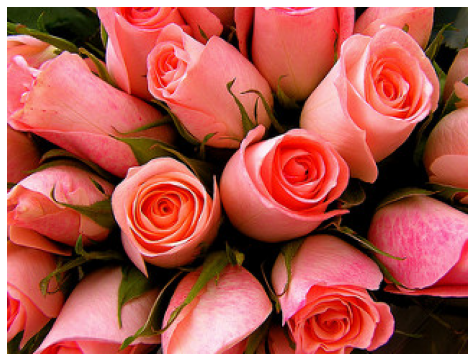

In [4]:
image_path = 'flowers/rose/118974357_0faa23cce9_n.jpg'
display_image(image_path)

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
#Define some parameters
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_datagen = tf.keras.preprocessing.image_dataset_from_directory(data_root,
                                                                    validation_split=0.2,
                                                                    subset='training',
                                                                    seed=123,
                                                                    image_size=(img_height, img_width),
                                                                    batch_size=batch_size)
valid_datagen = tf.keras.preprocessing.image_dataset_from_directory(data_root,
                                                                    validation_split=0.2,
                                                                    subset='validation',
                                                                    seed=123,
                                                                    image_size=(img_height, img_width),
                                                                    batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [9]:
class_names = train_datagen.class_names
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [10]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [11]:
num_classes = 5

model = tf.keras.models.Sequential([
        tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
        tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes)
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
epochs=10
history = model.fit(
  train_datagen,
  validation_data=valid_datagen,
  epochs=epochs
)

Epoch 1/10
108/108 [==============================] - 123s 1s/step - loss: 1.2946 - accuracy: 0.4540 - val_loss: 1.1490 - val_accuracy: 0.4855
Epoch 2/10
108/108 [==============================] - 40s 369ms/step - loss: 1.0213 - accuracy: 0.6083 - val_loss: 1.0025 - val_accuracy: 0.5898
Epoch 3/10
108/108 [==============================] - 40s 371ms/step - loss: 0.8416 - accuracy: 0.6853 - val_loss: 0.9817 - val_accuracy: 0.6269
Epoch 4/10
108/108 [==============================] - 40s 366ms/step - loss: 0.6555 - accuracy: 0.7464 - val_loss: 1.1705 - val_accuracy: 0.5875
Epoch 5/10
108/108 [==============================] - 40s 370ms/step - loss: 0.4656 - accuracy: 0.8309 - val_loss: 1.1047 - val_accuracy: 0.6222
Epoch 6/10
108/108 [==============================] - 40s 374ms/step - loss: 0.2871 - accuracy: 0.9068 - val_loss: 1.2316 - val_accuracy: 0.6547
Epoch 7/10
108/108 [==============================] - 40s 367ms/step - loss: 0.1833 - accuracy: 0.9409 - val_loss: 1.4746 - val_accu

In [19]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

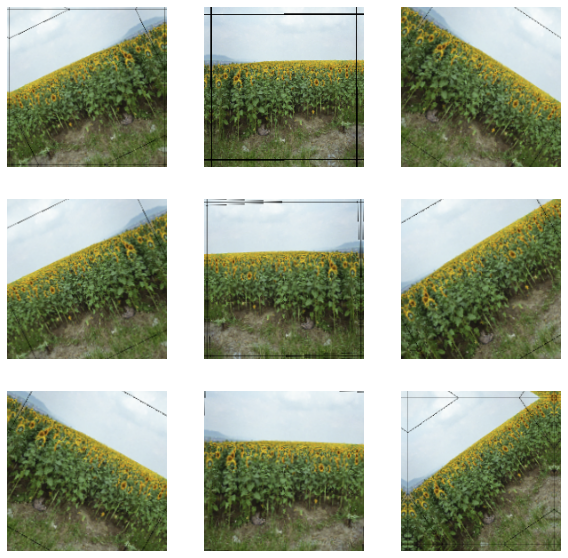

In [20]:
plt.figure(figsize=(10,10))
for images, _ in train_datagen.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis('off')

In [35]:
model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 45, 45, 64)       

In [43]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('models/models.hdf5', monitor='val_loss', save_best_only = True, mode='auto')
callback_list = [checkpoint]

In [44]:
epochs = 15
history = model.fit(train_datagen,
                   validation_data=valid_datagen,
                   epochs=epochs)
model.save('models/model.h5')

Epoch 1/15
108/108 [==============================] - 46s 425ms/step - loss: 0.8358 - accuracy: 0.6757 - val_loss: 0.8435 - val_accuracy: 0.6895
Epoch 2/15
108/108 [==============================] - 46s 424ms/step - loss: 0.7879 - accuracy: 0.6934 - val_loss: 0.8005 - val_accuracy: 0.7092
Epoch 3/15
108/108 [==============================] - 46s 428ms/step - loss: 0.7638 - accuracy: 0.7038 - val_loss: 0.7901 - val_accuracy: 0.6964
Epoch 4/15
108/108 [==============================] - 45s 417ms/step - loss: 0.7216 - accuracy: 0.7224 - val_loss: 0.7431 - val_accuracy: 0.7358
Epoch 5/15
108/108 [==============================] - 46s 424ms/step - loss: 0.7131 - accuracy: 0.7264 - val_loss: 0.7503 - val_accuracy: 0.7265
Epoch 6/15
108/108 [==============================] - 46s 427ms/step - loss: 0.6687 - accuracy: 0.7449 - val_loss: 0.7399 - val_accuracy: 0.7265
Epoch 7/15
108/108 [==============================] - 46s 424ms/step - loss: 0.6407 - accuracy: 0.7588 - val_loss: 0.7550 - val_ac

In [45]:
pixels = 224
BATCH_SIZE = 32
IMAGE_SIZE = (pixels,pixels)

datagen_kwargs = dict(rescale = 1./255,
                     validation_split=0.2)
dataflow_kwargs = dict(target_size = IMAGE_SIZE,
                      batch_size = BATCH_SIZE,
                      interpolation = 'bilinear')
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

In [47]:
valid_generator = valid_datagen.flow_from_directory(data_root, 
                                                    subset="validation", 
                                                    shuffle=False, 
                                                    **dataflow_kwargs)

Found 860 images belonging to 5 classes.


In [48]:
train_datagen = valid_datagen
train_generator = train_datagen.flow_from_directory(data_root, 
                                                    subset = "training",
                                                    shuffle = True, 
                                                    **dataflow_kwargs)

Found 3457 images belonging to 5 classes.


In [49]:
for image_batch, labels_batch in train_generator:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32, 5)


In [56]:
from tensorflow.keras.applications.mobilenet import  MobileNet

In [65]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

In [66]:
# Built the model.
NUM_CLASSES = 5
def get_model():
    base_model = MobileNet(include_top=False, weights="imagenet", input_shape=(224,224,3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(512, activation='relu')(x)
    outs = Dense(NUM_CLASSES, activation='softmax')(x)
    
        # Đóng băng các layer của base_model
    for layer in base_model.layers:
        layer.trainable = False

    model = Model(inputs=base_model.inputs, outputs= outs)
    return model

In [67]:
model = get_model()

In [68]:
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [69]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr = 0.005, momentum = 0.9),
             loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True,label_smoothing = 0.1),
             metrics = ["accuracy"])

In [74]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [75]:
checkpoint = ModelCheckpoint('models/best.hdf5', monitor='val_loss', save_best_only = True, mode='auto')
callback_list = [checkpoint]

steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = valid_generator.samples // valid_generator.batch_size
model.fit(train_generator, 
         epochs = 15,
         steps_per_epoch = steps_per_epoch,
         validation_data = valid_generator,
         validation_steps = validation_steps)
model.save('models/model_mbn.h5')

Epoch 1/15
108/108 [==============================] - 70s 652ms/step - loss: 1.0475 - accuracy: 0.9361 - val_loss: 1.0787 - val_accuracy: 0.8966
Epoch 2/15
108/108 [==============================] - 70s 652ms/step - loss: 1.0442 - accuracy: 0.9375 - val_loss: 1.0809 - val_accuracy: 0.8930
Epoch 3/15
108/108 [==============================] - 70s 652ms/step - loss: 1.0388 - accuracy: 0.9454 - val_loss: 1.0849 - val_accuracy: 0.8882
Epoch 4/15
108/108 [==============================] - 70s 652ms/step - loss: 1.0340 - accuracy: 0.9483 - val_loss: 1.0757 - val_accuracy: 0.9002
Epoch 5/15
108/108 [==============================] - 70s 652ms/step - loss: 1.0302 - accuracy: 0.9547 - val_loss: 1.0795 - val_accuracy: 0.8966
Epoch 6/15
108/108 [==============================] - 70s 652ms/step - loss: 1.0299 - accuracy: 0.9556 - val_loss: 1.0864 - val_accuracy: 0.8810
Epoch 7/15
108/108 [==============================] - 70s 652ms/step - loss: 1.0253 - accuracy: 0.9606 - val_loss: 1.0747 - val_ac

In [78]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))

This image most likely belongs to dandelion with a 27.55 percent confidence.
